<a href="https://colab.research.google.com/github/namespaiva/veraoUSP-ICDMQ/blob/main/atividade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tratamento

In [2]:
import pandas as pd
import numpy as np
import os

# Os arquivos tiveram alterações feitas fora deste .ipynb visto que
# por erros de formatação nos dados, o pandas não conseguia fazer a leitura deles.

if 'Retail_Data.csv' not in os.listdir():
  !wget 'https://raw.githubusercontent.com/namespaiva/veraoUSP-ICDMQ/refs/heads/main/Retail_Data.csv'
  trainO = pd.read_csv('Retail_Data.csv')

if 'Potential_Customers.csv' not in os.listdir():
  !wget 'https://raw.githubusercontent.com/namespaiva/veraoUSP-ICDMQ/refs/heads/main/Potential_Customers.csv'
  testO = pd.read_csv('Potential_Customers.csv')

train = trainO.copy()
test = testO.copy()

--2025-02-25 17:32:17--  https://raw.githubusercontent.com/namespaiva/veraoUSP-ICDMQ/refs/heads/main/Retail_Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1747389 (1.7M) [text/plain]
Saving to: ‘Retail_Data.csv’

Retail_Data.csv     100%[===================>]   1.67M  6.57MB/s    in 0.3s    

2025-02-25 17:32:18 (6.57 MB/s) - ‘Retail_Data.csv’ saved [1747389/1747389]

--2025-02-25 17:32:18--  https://raw.githubusercontent.com/namespaiva/veraoUSP-ICDMQ/refs/heads/main/Potential_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response.

In [3]:
trainO.sample(5)

,Cocunut,Mortgage_YN,AGE_AT_ORIGINATION,AGE,YEARS_WITH_BANK,MARTIAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR
1750,5875,N,NaN,55,11,M,BCR,STE,F,305,5639231,1984-04-28,1984-06-07,2005-08-11
6209,20851,N,NaN,26,3,S,HGH,PVE,M,479,4793846,1991-02-24,2013-07-01,2013-07-10
2379,8078,N,NaN,64,11,M,HGH,RET,M,241,2013846,1999-01-01,9999-10-01,2005-12-29
22452,74783,N,NaN,66,0,M,HGH,RET,M,423,76,1990-01-01,9999-10-01,2016-08-19
1650,5508,N,NaN,54,11,M,HGH,STE,F,304,8846154,1992-08-15,2005-06-01,2005-07-26


In [4]:
trainO.shape

(23983, 14)

In [5]:
train['AGE_AT_ORIGINATION'].dropna().count()
# De 23983 linhas, apenas 304 não são NA. Por isso, essa coluna será removida.

306

In [6]:
train.drop(['Cocunut','AGE_AT_ORIGINATION'], axis=1, inplace=True)
train.shape

(23983, 12)

In [7]:
# Tratamento de colunas de data. Transformei tudo para datetime e removi os erros.
# Troquei as colunas CURRENT_ADDRESS_DATE' e 'CURRENT_BALANCE_EUR' pois acredito que elas estejam invertidas.
train['CURRENT_WITH_BANK_DATE'] = pd.to_datetime(train['CURRENT_WITH_BANK_DATE'], format='mixed', errors='coerce')
train['CURRENT_JOB_DATE'] = pd.to_datetime(train['CURRENT_JOB_DATE'], format='mixed', errors='coerce')

temp = train['CURRENT_ADDRESS_DATE']
train['CURRENT_ADDRESS_DATE'] = pd.to_datetime(train['CURRENT_BALANCE_EUR'], format='mixed', errors='coerce')
train['CURRENT_BALANCE_EUR'] = temp

train['CURRENT_BALANCE_EUR'] = pd.to_numeric(train['CURRENT_BALANCE_EUR'], errors='coerce')

train['CURRENT_ADDRESS_DATE'] = train['CURRENT_ADDRESS_DATE'].dt.date
train['CURRENT_WITH_BANK_DATE'] = train['CURRENT_WITH_BANK_DATE'].dt.date
train['CURRENT_JOB_DATE'] = train['CURRENT_JOB_DATE'].dt.date

train.dropna(subset=['CURRENT_BALANCE_EUR','CURRENT_ADDRESS_DATE', 'CURRENT_WITH_BANK_DATE', 'CURRENT_JOB_DATE'], inplace=True)

In [8]:
trainO['MARTIAL_STATUS'][trainO['MARTIAL_STATUS'] == '*noval*'].count()

43

In [9]:
# Corrigindo 'Martial' (Marcial) para 'Marital'
train.rename(columns={'MARTIAL_STATUS': 'MARITAL_STATUS'}, inplace=True)

# Traduzindo e limpando valores
train['MARITAL_STATUS'] = train['MARITAL_STATUS'][train['MARITAL_STATUS'] != '*noval*' ]
train.dropna(subset=['MARITAL_STATUS'], inplace=True)

train['MARITAL_STATUS'] = train['MARITAL_STATUS'].replace({'S': 'Solteiro',
                                                           'M': 'Casado',
                                                           'W': 'Viúvo(a)',
                                                           'D': 'Divorciado'})

train['EMPLOYMENT'] = train['EMPLOYMENT'].replace({
    'PVE': 'Setor Privado',
    'SFE': 'Autônomo',
    'STE': 'Servidor Público',
    'OTH': 'Outro',
    'RET': 'Aposentado'
})

train['GENDER'] = train['GENDER'].replace({'M': 'Masculino',
                                           'F': 'Feminino'})

train['EDUCATION'] = train['EDUCATION'].replace({'HGH': 'Ensino Médio',
                                                 'BCR': 'Graduação',
                                                 'MAS': 'Mestrado',
                                                 'SEC': 'Ensino Fundamental II',
                                                 'PHD': 'Doutorado',
                                                 'PRS': 'Curso Profissionalizante',
                                                 'PRI': 'Ensino Fundamental I',
                                                 'OTH': 'Outros' })

In [10]:
train.sample(5)

,Mortgage_YN,AGE,YEARS_WITH_BANK,MARITAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR
19838,N,46,1,Casado,Graduação,Setor Privado,Feminino,1122,2016-06-27,2003-01-01,2008-01-01,382231.0
8856,N,47,11,Casado,Ensino Médio,Servidor Público,Feminino,320,2005-12-20,1990-03-01,1997-02-05,1923077.0
3727,N,40,9,Casado,Graduação,Servidor Público,Feminino,522,2007-12-05,1977-01-09,2007-11-01,6615385.0
7785,N,63,2,Casado,Ensino Médio,Aposentado,Feminino,184,2015-01-05,1954-11-20,2000-03-24,6153846.0
20550,N,31,5,Casado,Ensino Médio,Setor Privado,Feminino,184,2012-06-29,2014-12-01,2015-06-01,3153846.0


In [11]:
train.shape

(17836, 12)

In [12]:
test.shape

(2747, 12)

In [13]:
# Mesmo tratamento para o df de teste.
test.drop(['Cocunut'], axis=1, inplace=True)
test['CURRENT_WITH_BANK_DATE'] = pd.to_datetime(test['CURRENT_WITH_BANK_DATE'], format='mixed', errors='coerce')
test['CURRENT_JOB_DATE'] = pd.to_datetime(test['CURRENT_JOB_DATE'], format='mixed', errors='coerce')

temp = test['CURRENT_ADDRESS_DATE']
test['CURRENT_ADDRESS_DATE'] = pd.to_datetime(test['CURRENT_BALANCE_EUR'], format='mixed', errors='coerce')
test['CURRENT_BALANCE_EUR'] = temp

test['CURRENT_BALANCE_EUR'] = pd.to_numeric(test['CURRENT_BALANCE_EUR'], errors='coerce')

test['CURRENT_ADDRESS_DATE'] = test['CURRENT_ADDRESS_DATE'].dt.date
test['CURRENT_WITH_BANK_DATE'] = test['CURRENT_WITH_BANK_DATE'].dt.date
test['CURRENT_JOB_DATE'] = test['CURRENT_JOB_DATE'].dt.date

test.dropna(subset=['CURRENT_BALANCE_EUR', 'CURRENT_ADDRESS_DATE', 'CURRENT_WITH_BANK_DATE', 'CURRENT_JOB_DATE'], inplace=True)

test.rename(columns={'MARTIAL_STATUS': 'MARITAL_STATUS'}, inplace=True)

test['MARITAL_STATUS'] = test['MARITAL_STATUS'][test['MARITAL_STATUS'] != '*noval*' ]
test.dropna(subset=['MARITAL_STATUS'], inplace=True)

test['MARITAL_STATUS'] = test['MARITAL_STATUS'].replace({'S': 'Solteiro',
                                                           'M': 'Casado',
                                                           'W': 'Viúvo(a)',
                                                           'D': 'Divorciado'})
test['EMPLOYMENT'] = test['EMPLOYMENT'].replace({
    'PVE': 'Setor Privado',
    'SFE': 'Autônomo',
    'STE': 'Servidor Público',
    'OTH': 'Outro',
    'RET': 'Aposentado'
    })

test['GENDER'] = test['GENDER'].replace({'M': 'Masculino',
                                           'F': 'Feminino'})

test['EDUCATION'] = test['EDUCATION'].replace({'HGH': 'Ensino Médio',
                                                 'BCR': 'Graduação',
                                                 'MAS': 'Mestrado',
                                                 'SEC': 'Ensino Fundamental II',
                                                 'PHD': 'Doutorado',
                                                 'PRS': 'Curso Profissionalizante',
                                                 'PRI': 'Ensino Fundamental I',
                                                 'OTH': 'Outros' })

In [14]:
test.sample(5)

,AGE,YEARS_WITH_BANK,MARITAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR
1928,64,1,Casado,Ensino Médio,Aposentado,Masculino,369,2015-07-16,1974-03-01,2000-10-02,2307692.0
1323,33,12,Casado,Graduação,Setor Privado,Masculino,232,2004-08-04,2014-11-01,2013-05-01,7.0
2121,34,6,Casado,Graduação,Setor Privado,Masculino,501,2010-11-26,2013-06-01,2010-10-14,8153846.0
905,33,0,Casado,Ensino Médio,Setor Privado,Masculino,293,2016-10-12,1984-10-23,2015-09-01,8461538.0
2555,40,1,Casado,Ensino Médio,Setor Privado,Masculino,164,2016-03-24,2014-01-01,2011-01-03,2538462.0


In [15]:
test.shape

(1973, 11)

# 1 Prepare um conjunto de perguntas com base nos dados para iniciar uma conversa durante a reunião.

- Qual é o significado exato das colunas e seus valores?
- Algumas colunas possuem inconsistências, algumas não possuem nome ou estão com valores incongruentes ao que deveriam representar, como preferem prosseguir?
- A coluna CURRENT_ADDRESS_DATE não apresenta valores de data, mas a coluna CURRENT_BALANCE_EUR, sim. Elas poderiam estar invertidas?
- Quais critérios atualmente são analisados para os empréstimos e como é feita essa análise?

# 2 Realize uma análise exploratória dos dados, indicando padrões interessantes para o cliente de relacionamentos.

<Axes: >

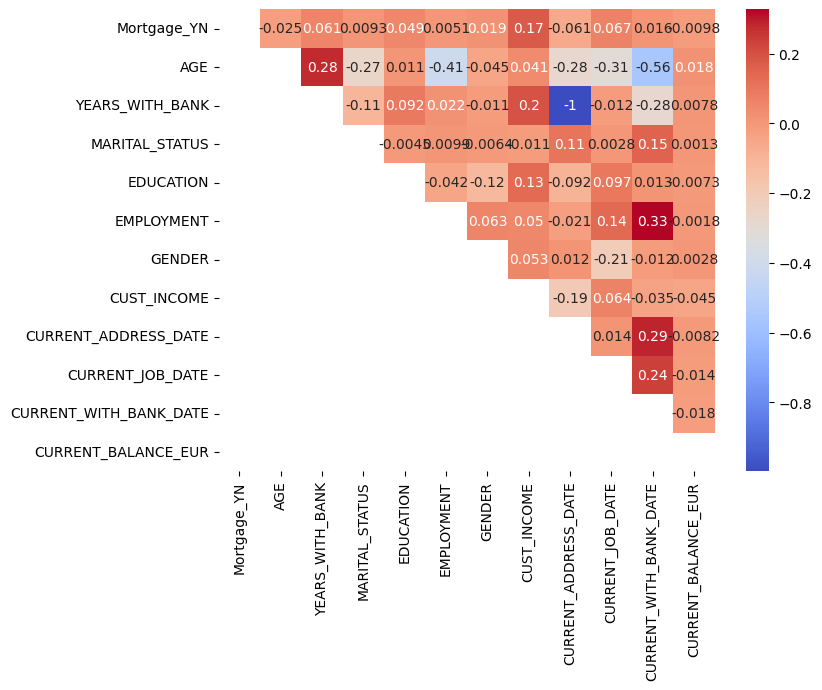

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import LabelEncoder

df = train.copy()
dfnum = train.copy()
encoder = LabelEncoder()
cols = ['Mortgage_YN','MARITAL_STATUS', 'EDUCATION', 'EMPLOYMENT', 'GENDER']
for col in cols:
  dfnum[col] = encoder.fit_transform(dfnum[col])

for col in ['CURRENT_ADDRESS_DATE', 'CURRENT_WITH_BANK_DATE', 'CURRENT_JOB_DATE']:
    dfnum[col] = dfnum[col].apply(lambda x: pd.Timestamp(x).toordinal() if pd.notnull(x) else None)


dfnorm = dfnum.copy()
dfnorm = (dfnorm - dfnorm.min()) / (dfnorm.max() - dfnorm.min())

color = sns.color_palette("Paired")
mask = np.tril(np.ones_like(dfnorm.corr(), dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(dfnorm.corr(), mask=mask, cmap= 'coolwarm', annot=True)

# YEARS_WITH_BANK possui altissima correlação com CURRENT_ADDRESS_DATE
# Escolho remover YEARS_WITH_BANK por acreditar ser a menos importante para o desempenho do modelo.
# A variável alvo (Mortgage_YN) mostrou uma maior correlação (embora ainda fraca) com a variável de renda do cliente.

Text(0, 0.5, 'Contagem')

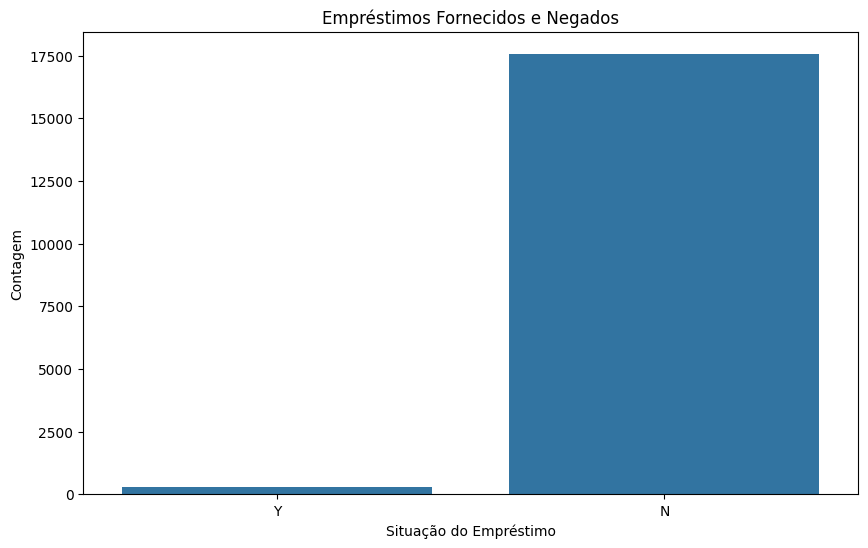

In [17]:
figsize = (10, 6)
plt.figure(figsize=figsize)
sns.countplot(x='Mortgage_YN', data=df)
plt.title('Empréstimos Fornecidos e Negados')
plt.xlabel('Situação do Empréstimo')
plt.ylabel('Contagem')

# A maioria esmagadora dos empréstimos do dataset foram negados. Isso pode causar problemas para o modelo.

<ipython-input-18-3ee8745b50e1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='EMPLOYMENT', data=df, palette='viridis', ax=axes[0, 0])
<ipython-input-18-3ee8745b50e1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='EDUCATION', data=df, palette='viridis', ax=axes[0, 1])
<ipython-input-18-3ee8745b50e1>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='MARITAL_STATUS', data=df, palette='viridis', ax=axes[1, 0])
<ipython-input-18-3ee8745b50e1>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will

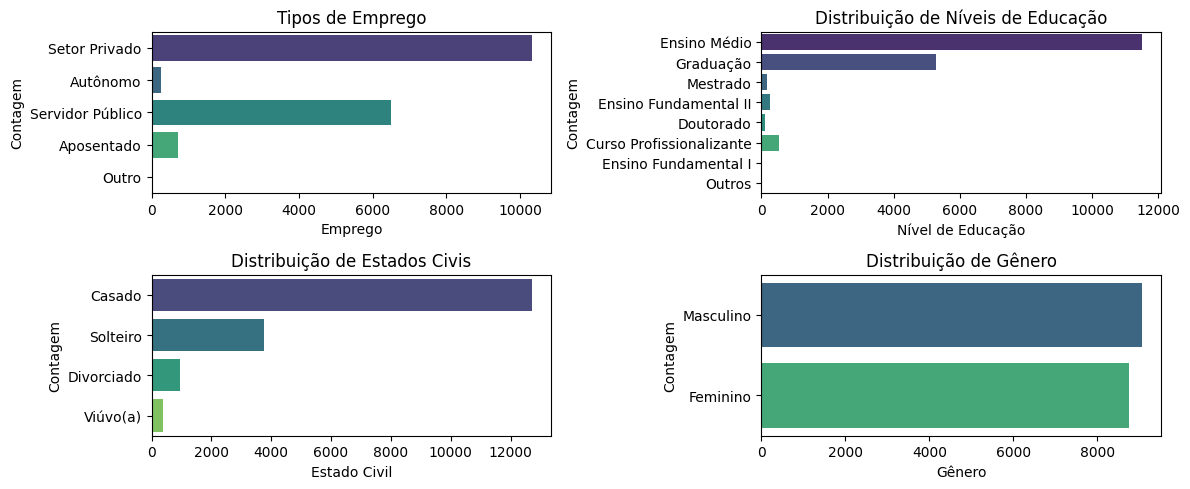

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(12, 5))

sns.countplot(y='EMPLOYMENT', data=df, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Tipos de Emprego')
axes[0, 0].set_xlabel('Emprego')
axes[0, 0].set_ylabel('Contagem')

sns.countplot(y='EDUCATION', data=df, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Distribuição de Níveis de Educação')
axes[0, 1].set_xlabel('Nível de Educação')
axes[0, 1].set_ylabel('Contagem')

sns.countplot(y='MARITAL_STATUS', data=df, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Distribuição de Estados Civis')
axes[1, 0].set_xlabel('Estado Civil')
axes[1, 0].set_ylabel('Contagem')

sns.countplot(y='GENDER', data=df, palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Distribuição de Gênero')
axes[1, 1].set_xlabel('Gênero')
axes[1, 1].set_ylabel('Contagem')

plt.tight_layout()
plt.show()

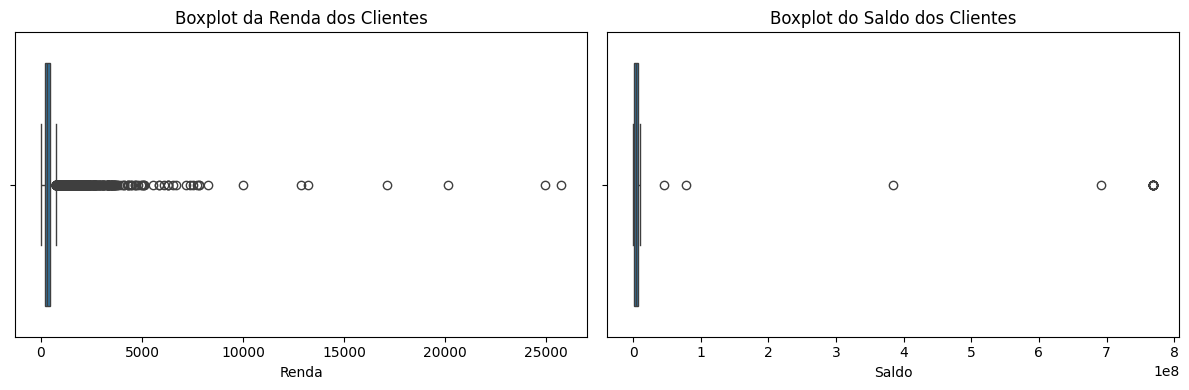

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.boxplot(x='CUST_INCOME', data=df, ax=axes[0])
axes[0].set_title('Boxplot da Renda dos Clientes')
axes[0].set_xlabel('Renda')

sns.boxplot(x='CURRENT_BALANCE_EUR', data=df)
axes[1].set_title('Boxplot do Saldo dos Clientes')
axes[1].set_xlabel('Saldo')

plt.tight_layout()
plt.show()

# Existem outliers bastante gritantes quanto a renda e saldo dos clientes, o saldo tendo uma discrepância especialmente notável.

# 3 Crie um modelo para prever quais potenciais clientes deveriam ser abordados.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

X = dfnum.drop(['YEARS_WITH_BANK','Mortgage_YN'], axis=1)
y = dfnum['Mortgage_YN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy}")
print(f"F1 Score do modelo: {f1_score(y_test, y_pred)}")

Acurácia do modelo: 0.9831838565022422
F1 Score do modelo: 0.0


### O F1 Score avalia a performance do modelo. Um F1 Score baixo e acurácia alta podem denunciar um grande viés nos dados de tratamento. Nesse caso, o modelo apenas "chuta" N para todos os empréstimos e quase sempre "acerta" devido a quantidade de empréstimos negados na base original.

In [21]:
for col in ['CURRENT_ADDRESS_DATE', 'CURRENT_WITH_BANK_DATE', 'CURRENT_JOB_DATE']:
    test[col] = test[col].apply(lambda x: pd.Timestamp(x).toordinal() if pd.notnull(x) else None)

cols_test= ['MARITAL_STATUS', 'EDUCATION', 'EMPLOYMENT', 'GENDER']

for col in cols_test:
  test[col] = encoder.fit_transform(test[col])

test_norm = (test - dfnorm.min()) / (dfnorm.max() - dfnorm.min())

X_test_final = test.drop(['YEARS_WITH_BANK'], axis=1)
y_pred_test = modelo.predict(X_test_final)

test['Mortgage_YN'] = y_pred_test
test['Mortgage_YN']

,Mortgage_YN
0,0
2,0
3,0
4,0
5,0
...,...
2742,0
2743,0
2744,0
2745,0


Text(0, 0.5, 'Contagem')

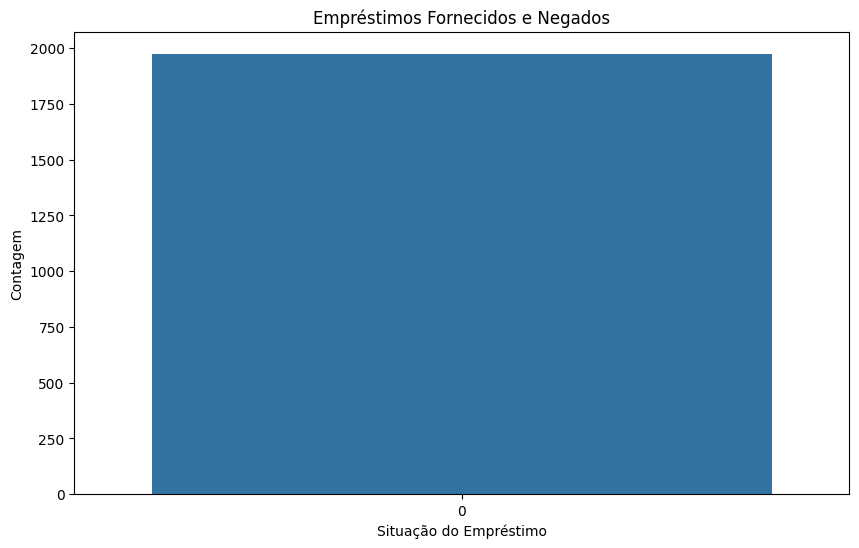

In [23]:
figsize = (10, 6)
plt.figure(figsize=figsize)
sns.countplot(x='Mortgage_YN', data=test)
plt.title('Empréstimos Fornecidos e Negados')
plt.xlabel('Situação do Empréstimo')
plt.ylabel('Contagem')

# 4 Valide seu(s) modelo(s) utilizando o conceito de matriz de confusão

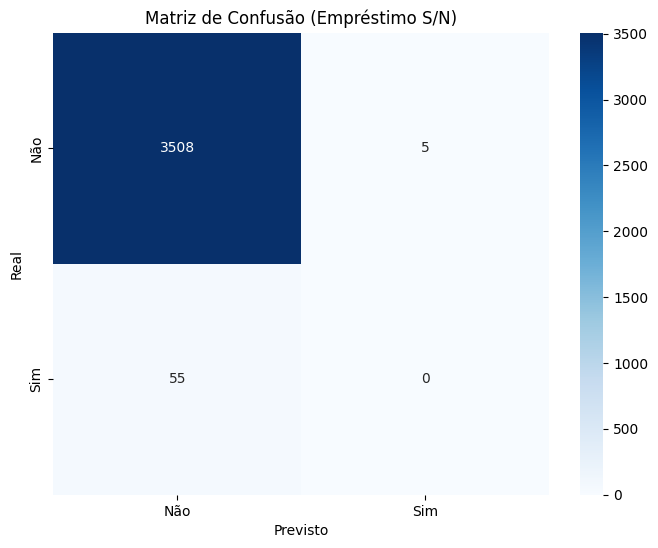

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Não', 'Sim'],
            yticklabels=['Não', 'Sim'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão (Empréstimo S/N)')
plt.show()

### Como os dados de treinamento possuíam uma quantidade de empréstimos negados extremamente desproporcional, o modelo acaba enviesado para negar empréstimos.

### Apesar da acurácia, o modelo não é confiável, como o F1 Score e a matriz de confusão mostram: o modelo não acertou nenhum empréstimo positivo.